In [1]:
import time
import random
import numpy as np
import torch
from collections import defaultdict

In [119]:
word2index = defaultdict(lambda : len(word2index))

In [120]:
tag2index = defaultdict(lambda : len(tag2index))

In [121]:
def read_data(file_name):
    with open(file_name) as f:
        for line in f:
            label, sentence = line.lower().strip().split(" ||| ")
            yield ([word2index[word] for word in sentence.split()], tag2index[label])

In [122]:
train = list(read_data("../../cmu_course_data/classes/train.txt"))

In [123]:
UNK = word2index["UNK"]

In [124]:
word2index = defaultdict(lambda : UNK, word2index)

In [125]:
len(word2index)

16580

In [126]:
dev = list(read_data("../../cmu_course_data/classes/dev.txt"))

In [127]:
len(word2index)

17612

In [128]:
words_num = len(word2index)
tags_num = len(tag2index)

In [129]:
train[0][0]

[0,
 1,
 2,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 8,
 16,
 4,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [130]:
class Net(torch.nn.Module):
    
    def __init__(self, vocab_num, embedding_dim, tags_num):
        
        super(Net, self).__init__()
        
        self.embedding = torch.nn.Embedding(vocab_num, embedding_dim) # output will be (input_length, embedding_dim)
        self.fc = torch.nn.Linear(embedding_dim, tags_num)
    
    def forward(self, x):
        # x (input_length)
        
        x = self.embedding(x) # x (input_length, embedding_dim)
        x = torch.mean(x, dim=0, keepdim=True) # x (1, embedding_dim)
        x = self.fc(x) # x (1, tags_num)
        return x

In [131]:
Embedding_size = 128

In [132]:
net = Net(words_num, Embedding_size, tags_num)

In [133]:
print(net)

Net(
  (embedding): Embedding(17612, 128)
  (fc): Linear(in_features=128, out_features=5, bias=True)
)


In [134]:
criterion = torch.nn.CrossEntropyLoss()

In [135]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [136]:
EPOCH = 50

In [137]:
cal_pred = torch.nn.Softmax(dim=0)

In [138]:
loss_trace = []
acc_trace = []

In [139]:
for epoch in range(EPOCH):
    
    random.shuffle(train)
    
    train_loss = 0.0
    st = time.time()
    
    for word_list, label in train:
        
        optimizer.zero_grad()
        output = net(torch.tensor(word_list))
        loss = criterion(output, torch.unsqueeze(torch.tensor(label), dim=0))
        
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
#         print(loss.item())
    print("Epoch: {}, time: {}, loss: {}".format(epoch, time.time() - st, train_loss / len(train)))
    loss_trace.append(train_loss / len(train))
    
    correct_num = 0
    
    with torch.no_grad():
    
        for test_word_list, test_label in dev:
            
            output = net(torch.tensor(test_word_list))

            output = torch.squeeze(output, dim=0)
            
            pred = cal_pred(output)
            
            if torch.argmax(pred).item() == test_label:
                correct_num += 1

    print("Epoch: {}, test accuracy: {}".format(epoch, correct_num / len(dev)))
    acc_trace.append(correct_num / len(dev))

Epoch: 0, time: 374.40219473838806, loss: 1.5091973212669685
Epoch: 0, test accuracy: 0.36330608537693004
Epoch: 1, time: 401.25621604919434, loss: 1.2542389366053714
Epoch: 1, test accuracy: 0.3960036330608538
Epoch: 2, time: 402.28519225120544, loss: 1.0122748883321186
Epoch: 2, test accuracy: 0.3823796548592189
Epoch: 3, time: 401.9675030708313, loss: 0.8003358568058794
Epoch: 3, test accuracy: 0.36603088101725706
Epoch: 4, time: 401.92529821395874, loss: 0.624837956773842
Epoch: 4, test accuracy: 0.3569482288828338
Epoch: 5, time: 402.0224723815918, loss: 0.48613677641502323
Epoch: 5, test accuracy: 0.3496821071752952
Epoch: 6, time: 403.5144748687744, loss: 0.3818990976218463
Epoch: 6, test accuracy: 0.3333333333333333
Epoch: 7, time: 403.0511975288391, loss: 0.30141036178530106
Epoch: 7, test accuracy: 0.34514078110808355
Epoch: 8, time: 402.99790143966675, loss: 0.23829518173270664
Epoch: 8, test accuracy: 0.33969118982742963
Epoch: 9, time: 403.07351779937744, loss: 0.188277582

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

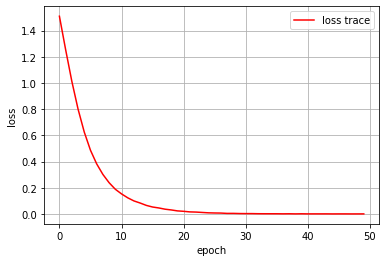

In [151]:
plt.plot(loss_trace, label="loss trace", color="r")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

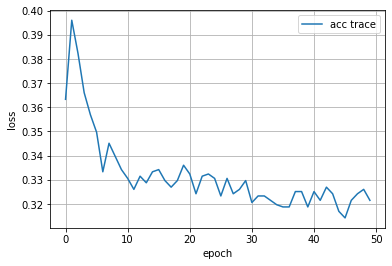

In [152]:
plt.plot(acc_trace, label="acc trace")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()